# Visualisasi Data London Crime By lsoa
Project ini akan memvisualisasi inside terkait kriminal yang ada di kota london data ini diambil dari kaggel, data ini mencakup jumlah laporan kriminal tiap bulan wilayah lsoa dan kategorinya dari januari 2008-desember 2016. 




## Import Pustaka

In [21]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import plot as plt
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection 

### Load Data Set

In [22]:
df = pd.read_csv("london_crime_by_lsoa.csv")
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


## Cek Tipe Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


## Cek Baris Data

In [5]:
df.count()

lsoa_code         13490604
borough           13490604
major_category    13490604
minor_category    13490604
value             13490604
year              13490604
month             13490604
dtype: int64

## Eksplorasi Data Analisis

In [6]:
df.count().isnull()

lsoa_code         False
borough           False
major_category    False
minor_category    False
value             False
year              False
month             False
dtype: bool

In [7]:
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [8]:
df["major_category"].value_counts()

major_category
Theft and Handling             3966300
Violence Against the Person    3171744
Criminal Damage                2069172
Drugs                          1179468
Burglary                       1043604
Robbery                         939384
Other Notifiable Offences       776304
Fraud or Forgery                236520
Sexual Offences                 108108
Name: count, dtype: int64

In [9]:
df["minor_category"].value_counts()

minor_category
Common Assault                            522180
Theft From Motor Vehicle                  522180
Other Theft                               522180
Burglary in Other Buildings               522072
Theft/Taking Of Motor Vehicle             522072
Harassment                                522072
Criminal Damage To Motor Vehicle          521964
Assault with Injury                       521856
Other Criminal Damage                     521856
Possession Of Drugs                       521748
Burglary in a Dwelling                    521532
Criminal Damage To Dwelling               521424
Personal Property                         520668
Motor Vehicle Interference & Tampering    520452
Other Notifiable                          519696
Other Theft Person                        519480
Wounding/GBH                              519372
Theft/Taking of Pedal Cycle               516996
Other violence                            512028
Criminal Damage To Other Building         503928
Drug 

## Data Visualisasi dan Analisis

### Area Plot

#### Perbandingan  major_category dan minor_category di london dari tahun 2011 sampai dengan tahun 2016 ?

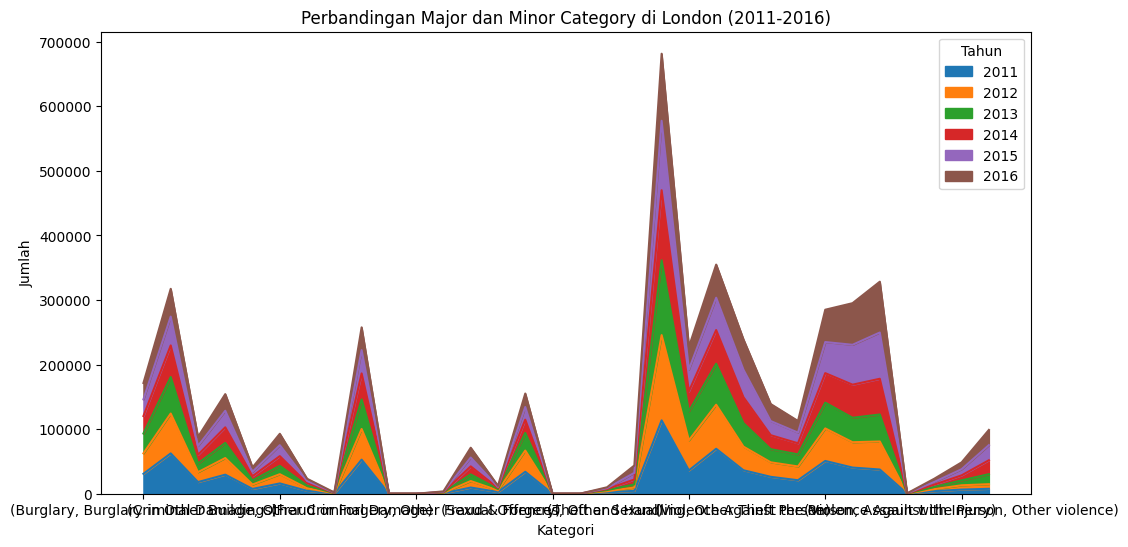

In [35]:
data = df[(df['year'] >= 2011) & (df['year'] <= 2016)]
pivot_data = data.pivot_table(index=['major_category', 'minor_category'], columns='year', values='value', aggfunc='sum', fill_value=0)
pivot_data.plot(kind='area', stacked=True, figsize=(12, 6))
plt.title('Perbandingan Major dan Minor Category di London (2011-2016)')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.legend(title='Tahun')
plt.show()


### Histogram

 #### Berapakah angka kejahatan di tahun 2010 ?

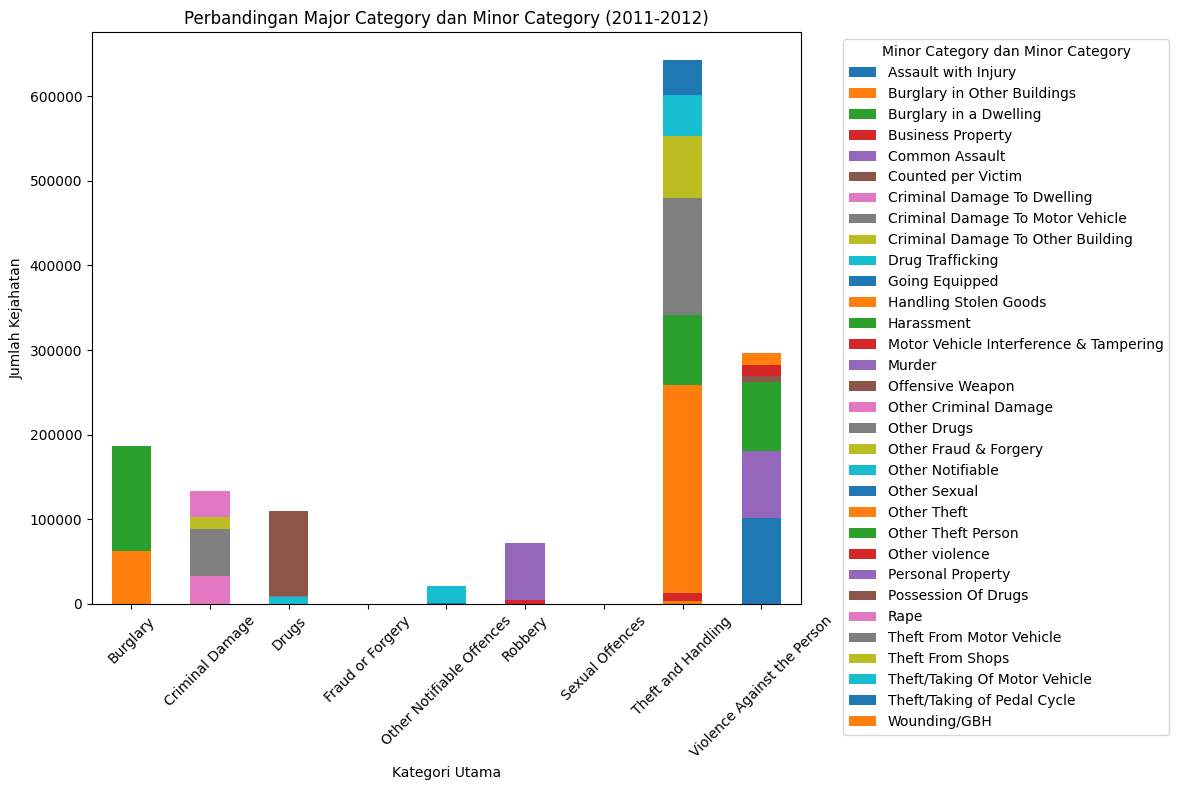

In [40]:
df_2011_2012 = df[(df['year'] >= 2011) & (df['year'] <= 2012)]
crime_counts = df_2011_2012.groupby(['major_category', 'minor_category'])['value'].sum().unstack().fillna(0)
crime_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Perbandingan Major Category dan Minor Category (2011-2012)')
plt.xlabel('Kategori Utama')
plt.ylabel('Jumlah Kejahatan')
plt.legend(title='Minor Category dan Minor Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Bar Chart 

#### Perbandingan Jumlah Tindak Kejahatan di London dari tahun 2011 sampai dengan tahun 2015?

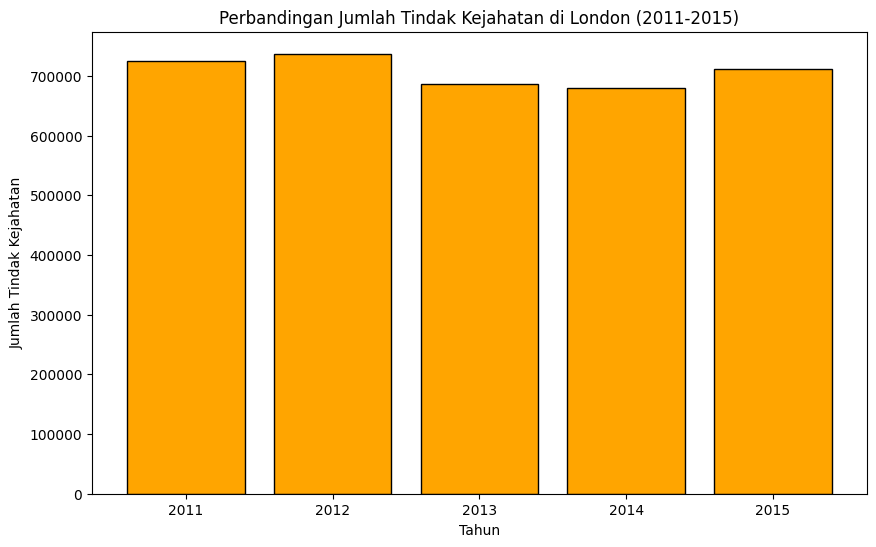

In [11]:
crime_data = df[(df['year'] >= 2011) & (df['year'] <= 2015)]
crime_counts = crime_data.groupby('year')['value'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(crime_counts['year'], crime_counts['value'], color='orange', edgecolor='black')
plt.title('Perbandingan Jumlah Tindak Kejahatan di London (2011-2015)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Tindak Kejahatan')
plt.xticks(crime_counts['year'])
plt.show()

### Pie Chart

#### Apa saja 3 tindak kejahatan terbesar yang terjadi di London?

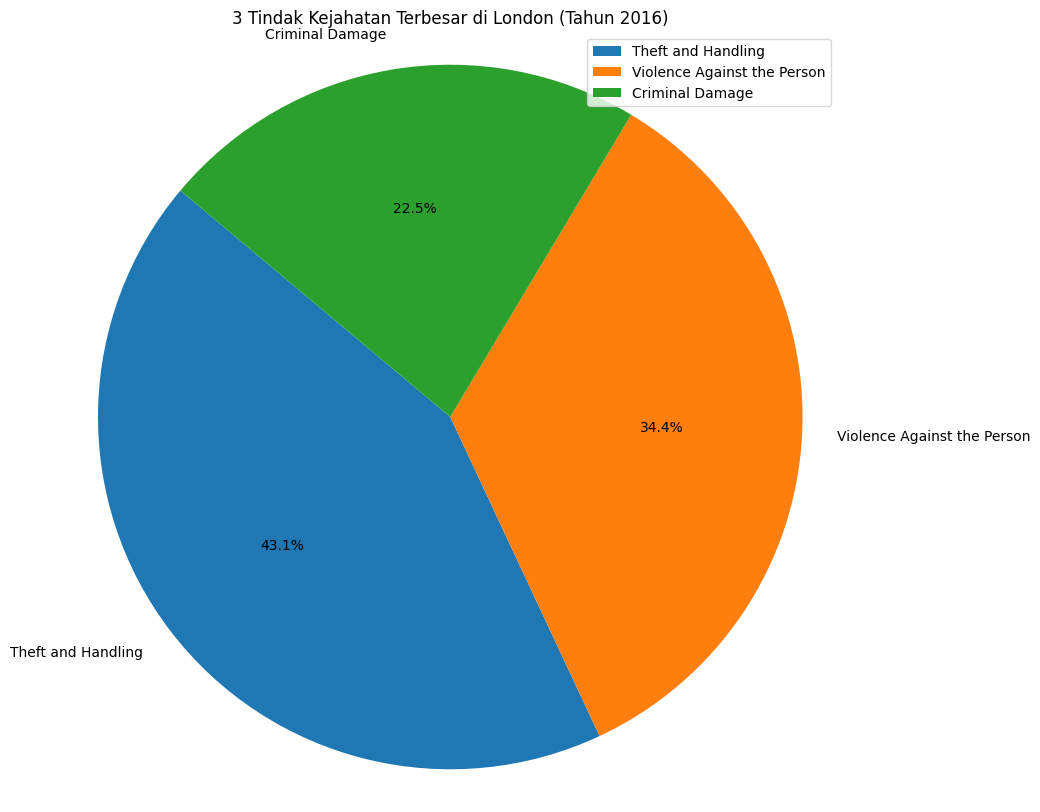

In [12]:
# Mengelompokkan data berdasarkan kategori kejahatan dan menghitung jumlahnya
tindak_kejahatan_terbesar = df['major_category'].value_counts().head(3)

# Memfilter hanya data untuk tahun 2016
data_tahun_terakhir = df[df['year'] == 2016]

# Menghitung jumlah tindak kejahatan berdasarkan kategori
jumlah_kejahatan_per_kategori = data_tahun_terakhir['major_category'].value_counts()

# Memilih tiga kategori teratas
top_3_categories = jumlah_kejahatan_per_kategori.head(3)

import matplotlib.pyplot as plt

# Data untuk pie chart
labels = top_3_categories.index
sizes = top_3_categories.values

# Membuat pie chart
plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('3 Tindak Kejahatan Terbesar di London (Tahun 2016)')
plt.axis('equal')
plt.legend()
plt.show()

### Box Plot

 #### Jumlah major dan minor category yang terjadi setiap bulan di london?

C:\Users\a c e r\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\a c e r\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\a c e r\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


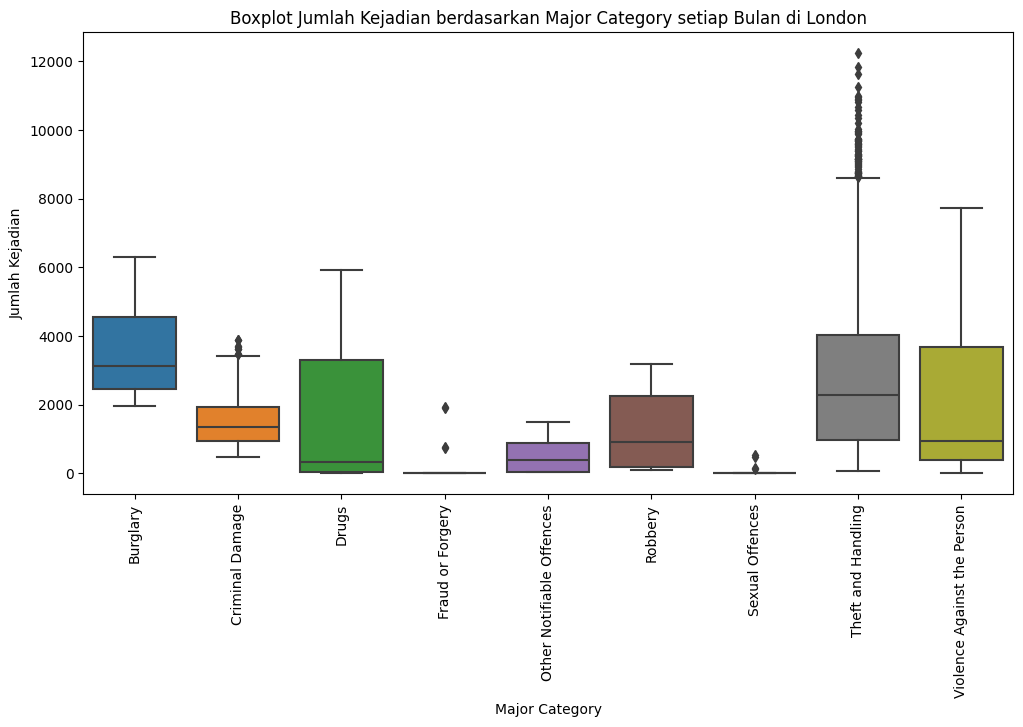

In [42]:
agg_df = df.groupby(['year', 'month', 'major_category', 'minor_category'])['value'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
plt.title('Boxplot Jumlah Kejadian berdasarkan Major Category setiap Bulan di London')
sns.boxplot(data=agg_df, x='major_category', y='value')
plt.ylabel('Jumlah Kejadian')
plt.xlabel('Major Category')
plt.show()


### Scatter Plot

#### Keseluruhan kejahatan di borough pada tindak kriminal di London?

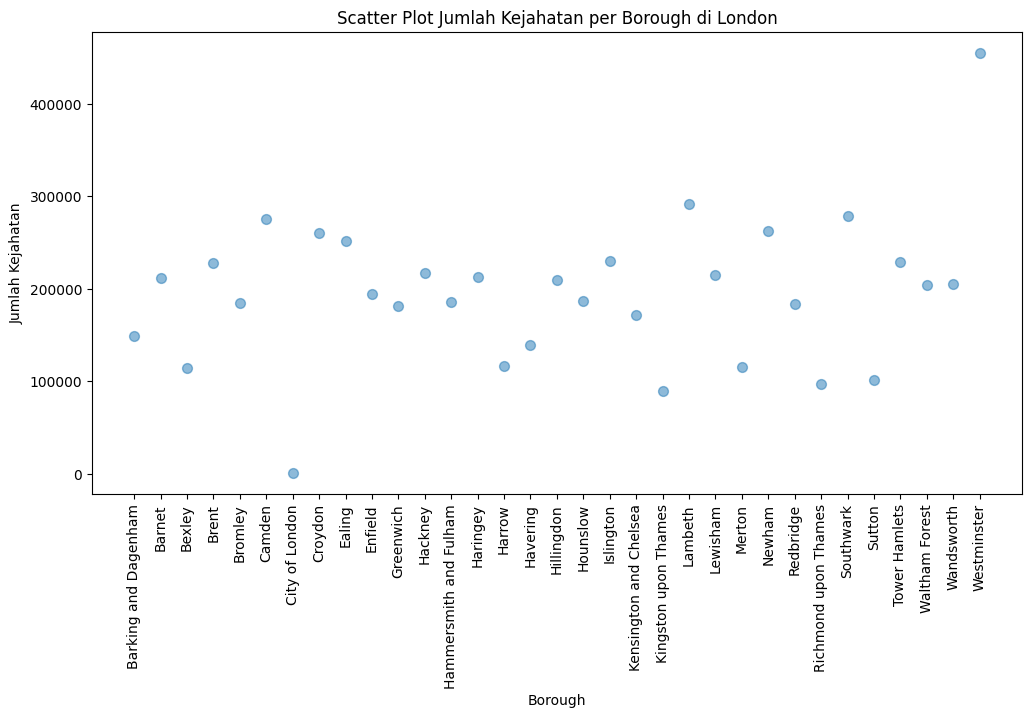

In [47]:
# Membuat Scatter Plot
plt.figure(figsize=(12, 6))

# Menggunakan Pandas untuk mengelompokkan data berdasarkan "borough" dan menghitung jumlah total kejahatan
borough_crime = df.groupby('borough')['value'].sum().reset_index()

# Membuat Scatter Plot
plt.scatter(borough_crime['borough'], borough_crime['value'], s=50, alpha=0.5)  # s mengatur ukuran titik, alpha mengatur transparansi

# Menambahkan judul dan label sumbu
plt.title('Scatter Plot Jumlah Kejahatan per Borough di London')
plt.xlabel('Borough')
plt.ylabel('Jumlah Kejahatan')

# Mengatur label sumbu x agar tidak tumpang tindih
plt.xticks(rotation=90)

# Menampilkan plot
plt.show()


### Word Clouds

#### Wilayah apa saja yang memiliki tindak kejahatan terbanyak di london ?

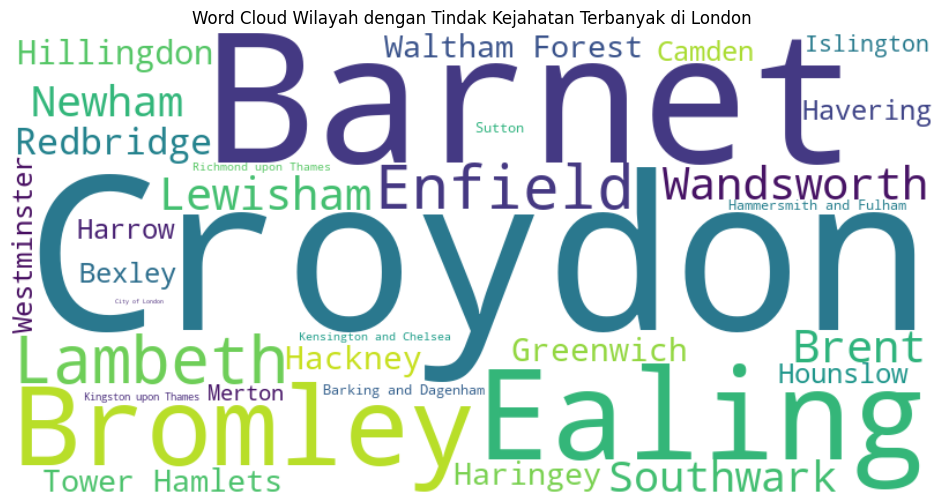

In [9]:
wilayah_terbanyak = df['borough'].value_counts().to_dict()

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wilayah_terbanyak)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Wilayah dengan Tindak Kejahatan Terbanyak di London')
plt.show()

## Line Plot

#### Menampilkan peningkatan dan penurunan tindak kejahatan dari setiap bulannya di London

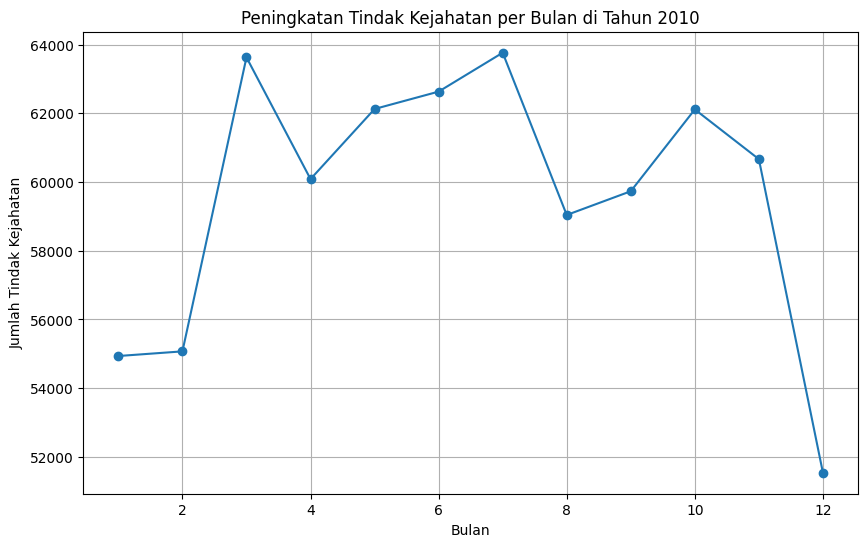

In [12]:
# Filter data untuk tahun 2010
data_2010 = df[df['year'] == 2010]

# Mengelompokkan data berdasarkan bulan dan menghitung jumlah tindak kejahatan per-bulan
crime_per_month = data_2010.groupby('month')['value'].sum()

# Membuat line plot
plt.figure(figsize=(10, 6))
plt.plot(crime_per_month.index, crime_per_month.values, marker='o', linestyle='-')
plt.title('Peningkatan Tindak Kejahatan per Bulan di Tahun 2010')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Tindak Kejahatan')
plt.grid(True)

# Menampilkan plot
plt.show()


## Kesimpulan

1.  Area Plot menghasilkan Perbandingan major category dan minor category di london dari tahun 2011 sampai dengan tahun 2016
2.  Menampilkan Histogram terkait angka kejahatan di tahun 2010 
3.  Menampilkan Bar Chart terkait Jumlah Tindak Kejahatan di London dari tahun 2011 sampai dengan tahun 2015, sehingga kita bisa mengetahui jumlah kejahatan dari tahun 2011 sampai 2015.
4.  Dengan Pie Chart dapat melihat tindak kejahatan terbesar yang terjadi di london
5.  Box Plot dapat melihat Jumlah major dan minor category yang terjadi setiap bulan di london
6.  Scatter Plot menampilkan Keseluruhan kejahatan di borough pada tindak kriminal di London
7.  Word Clouds menampilkan Wilayah apa saja yang memiliki tindak kejahatan terbanyak di london, di tandai dengan huruf yang paling besar
8.  Line Plot menampilkan grafik peningkatan dan penurunan tindak kejahatan dari seriap bulannya